In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
import sklearn as sk
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow import keras

2023-11-02 18:23:41.961945: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-02 18:23:41.976112: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 18:23:42.091279: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 18:23:42.092123: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 18:23:42.735934: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
# Read the dataset csv file
df = pd.read_csv("bashkam final.csv")
df.head()

,Country,Outside Dry-Bulb Temperature,Outside Dew-Point Temperature,Direct Normal Solar,Diffuse Horizontal Solar,Wind Speed,Wind Direction,Atmospheric Pressure,RES
0,AACHEN,15.316670,13.625000,0.013,1.736,2.925000,272.91670,100816.70,2
1,AB - BROOKS,19.833330,9.408334,0.385,5.101,2.670833,74.58334,93843.34,4
2,AK - AMBLER,9.162500,7.687500,0.192,2.189,2.370833,195.41670,100300.00,1
3,AK - ANAKTUVUK PASS,4.420834,-0.266667,0.000,2.015,3.545833,96.66666,93700.00,1
4,AK - ANCHORAGE LAKEHOOD,14.858330,9.525000,3.276,2.571,0.895833,114.58330,101000.00,3


In [3]:
# Drop the Country column it's useless
df = df.drop(columns=['Country'])
df.head()

,Outside Dry-Bulb Temperature,Outside Dew-Point Temperature,Direct Normal Solar,Diffuse Horizontal Solar,Wind Speed,Wind Direction,Atmospheric Pressure,RES
0,15.316670,13.625000,0.013,1.736,2.925000,272.91670,100816.70,2
1,19.833330,9.408334,0.385,5.101,2.670833,74.58334,93843.34,4
2,9.162500,7.687500,0.192,2.189,2.370833,195.41670,100300.00,1
3,4.420834,-0.266667,0.000,2.015,3.545833,96.66666,93700.00,1
4,14.858330,9.525000,3.276,2.571,0.895833,114.58330,101000.00,3


In [4]:
# The RES column is our labels, so let's extract them into a variable
y = df['RES'].values

In [5]:
# Now that we have extracted the RES column, we can now delete it from the feature dataset
df = df.drop(columns=['RES'])
df.head()

,Outside Dry-Bulb Temperature,Outside Dew-Point Temperature,Direct Normal Solar,Diffuse Horizontal Solar,Wind Speed,Wind Direction,Atmospheric Pressure
0,15.316670,13.625000,0.013,1.736,2.925000,272.91670,100816.70
1,19.833330,9.408334,0.385,5.101,2.670833,74.58334,93843.34
2,9.162500,7.687500,0.192,2.189,2.370833,195.41670,100300.00
3,4.420834,-0.266667,0.000,2.015,3.545833,96.66666,93700.00
4,14.858330,9.525000,3.276,2.571,0.895833,114.58330,101000.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Frequency')

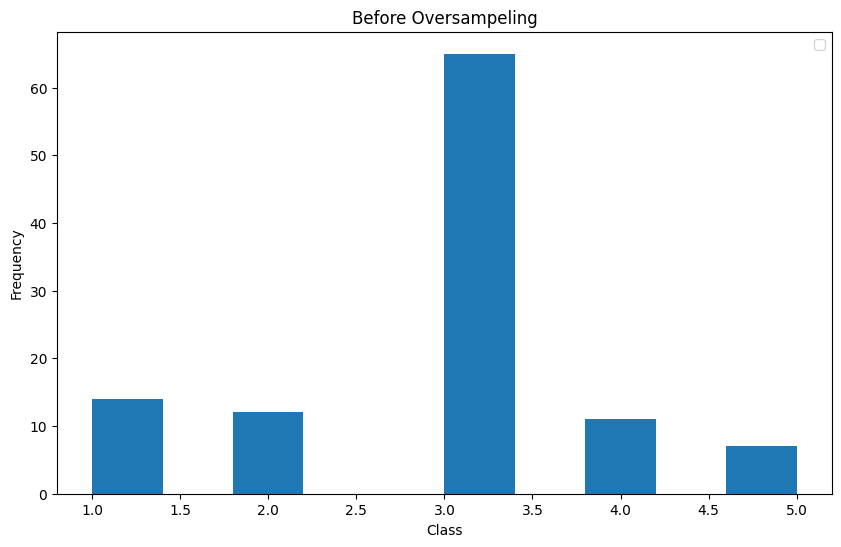

In [6]:
# Our data is so unbalenced, so we have to balenced them with oversampling
plt.figure(figsize=(10,6))
plt.hist(y)
plt.legend()
plt.title('Before Oversampeling')

plt.xlabel('Class')
plt.ylabel('Frequency')

In [7]:
# Before oversampling, let's normalize our data to improve the machine learning and deep learning results
scaler = StandardScaler()
df.iloc[:,0:]=scaler.fit_transform(df.iloc[:,0:].to_numpy())
df.head()

,Outside Dry-Bulb Temperature,Outside Dew-Point Temperature,Direct Normal Solar,Diffuse Horizontal Solar,Wind Speed,Wind Direction,Atmospheric Pressure
0,-0.838557,0.049435,-1.291204,-0.901978,-0.164086,1.551777,0.694759
1,-0.180351,-0.630757,-1.177632,3.339565,-0.342414,-1.250038,-0.585026
2,-1.735396,-0.908345,-1.236555,-0.330976,-0.552900,0.456950,0.599932
3,-2.426392,-2.191435,-1.295173,-0.550301,0.271501,-0.938071,-0.611333
4,-0.905350,-0.611937,-0.295005,0.150530,-1.587786,-0.684966,0.728399


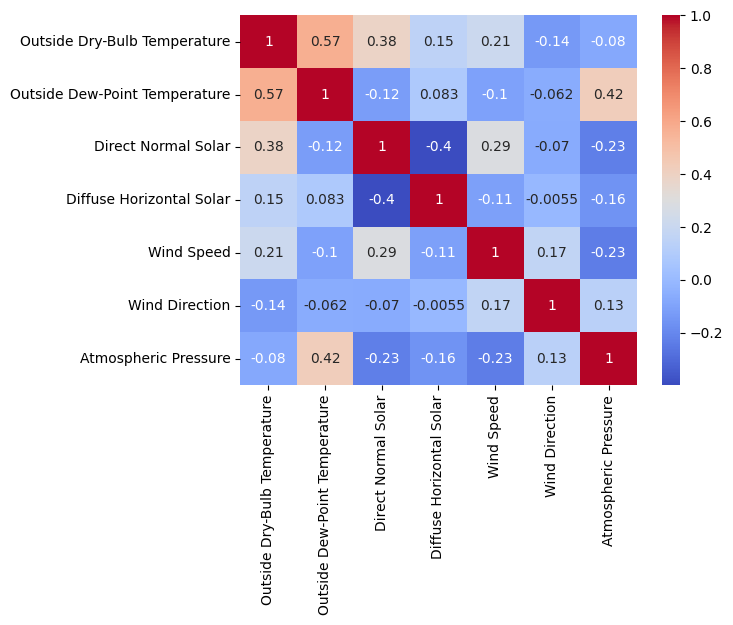

In [8]:
# Let's check the correlation in our dataset
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [9]:
# Now extract all features from our dataset to train our machine learning and deep learning model
X = df[['Outside Dry-Bulb Temperature', 'Direct Normal Solar']].values

In [10]:
# Show the number of values of each class before applying the SMOTE sampling
print("Number of values of each class before SMOTE:", Counter(y))

# Define a SMOTE object
smote = SMOTE(sampling_strategy='auto',random_state=42)

# Apply the SMOTE Algorithm into our data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Show the number of values of each class after SMOTE sampling
print("Number of values of each class after SMOTE:", Counter(y_resampled))

Number of values of each class before SMOTE: Counter({3: 65, 1: 14, 2: 12, 4: 11, 5: 7})
Number of values of each class after SMOTE: Counter({2: 65, 4: 65, 1: 65, 3: 65, 5: 65})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Frequency')

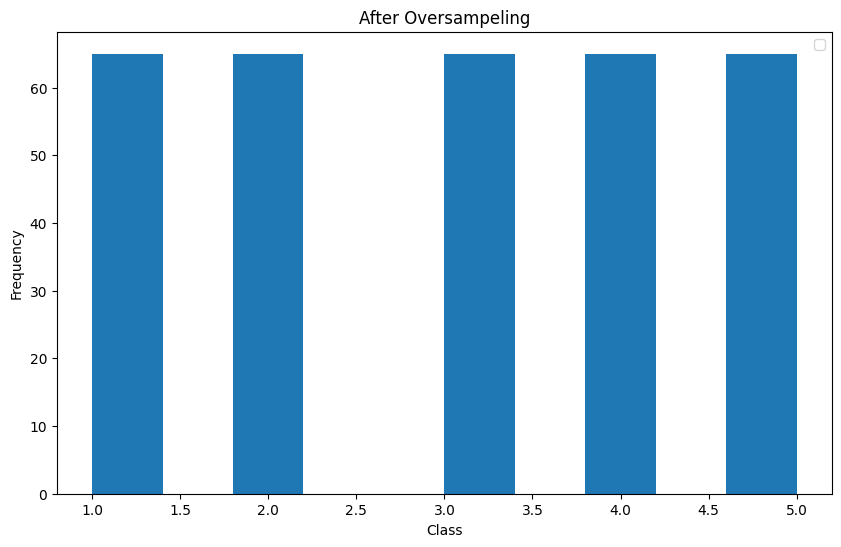

In [11]:
plt.figure(figsize=(10,6))
plt.hist(y_resampled)
plt.legend()
plt.title('After Oversampeling')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [12]:
# Split train and test samples
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# **KNN**

In [14]:
# Let's start train a KNN machine leraning model with our data
from sklearn.neighbors import KNeighborsClassifier

score = 0
score_list = []

# Find the best number of n_neighbors
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    score_list.append(score)

print('max score=' , max(score_list),'n_neighbors= ',score_list.index(max(score_list)) + 1)

max score= 0.676923076923077 n_neighbors=  5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Accuracy')

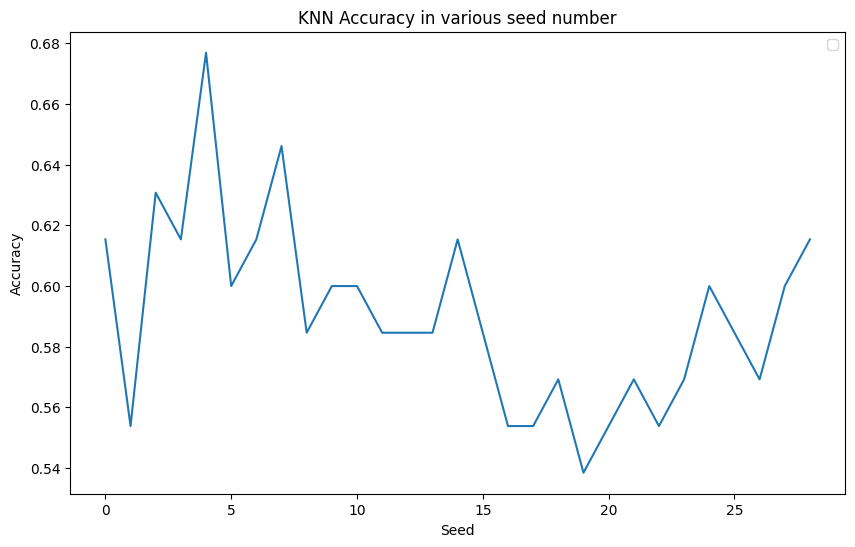

In [15]:
plt.figure(figsize = (10,6))
plt.plot(range(29), score_list)
plt.legend()
plt.title('KNN Accuracy in various seed number')
plt.xlabel('Seed')
plt.ylabel('Accuracy')

2023-11-02 13:55:13.160463: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-02 13:55:13.160925: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


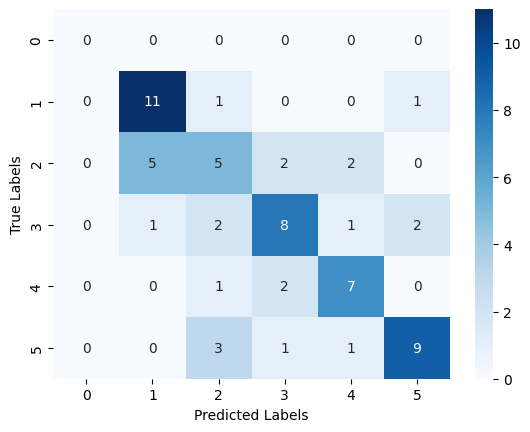

In [16]:
y_pred_knn = knn.predict(X_test)

# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix using a heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [17]:
knn_confusion_matrix_table = PrettyTable(['metrices', 'values'])

# To insert rows:
knn_confusion_matrix_table.add_row(['Precision', sk.metrics.precision_score(y_test, y_pred_knn, average='weighted')])
knn_confusion_matrix_table.add_row(['Recall', sk.metrics.recall_score(y_test, y_pred_knn, average='weighted')])
knn_confusion_matrix_table.add_row(['f1_score', sk.metrics.f1_score(y_test, y_pred_knn, average='weighted')])

print(knn_confusion_matrix_table)

+-----------+--------------------+
|  metrices |       values       |
+-----------+--------------------+
| Precision | 0.6111402925882564 |
|   Recall  | 0.6153846153846154 |
|  f1_score | 0.6088187595879904 |
+-----------+--------------------+


# **Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Buildthe Random Forest Classification model
clf = RandomForestClassifier(n_estimators = 4, random_state = 42)

# Train our macine learning model with the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {accuracy}")

Accuracy = 0.6615384615384615


In [14]:
best_score_RF = []

# Find the best n_estimator number
for j in range(150):
  X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = j)
  score = 0
  score_list_RF = []

  for i in range(1,30):
    clf = RandomForestClassifier(n_estimators = i, random_state = 42)

    # Train the model with taining data
    clf.fit(X_train, y_train)

    # Predict the labels with the test data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    score = accuracy
    score_list_RF.append(score)

  best_score_RF.append(max(score_list_RF))

print('max score=' , max(best_score_RF), 'Seed=', best_score_RF.index(max(best_score_RF)) + 1)

max score= 0.7538461538461538 Seed= 22


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Accuracy')

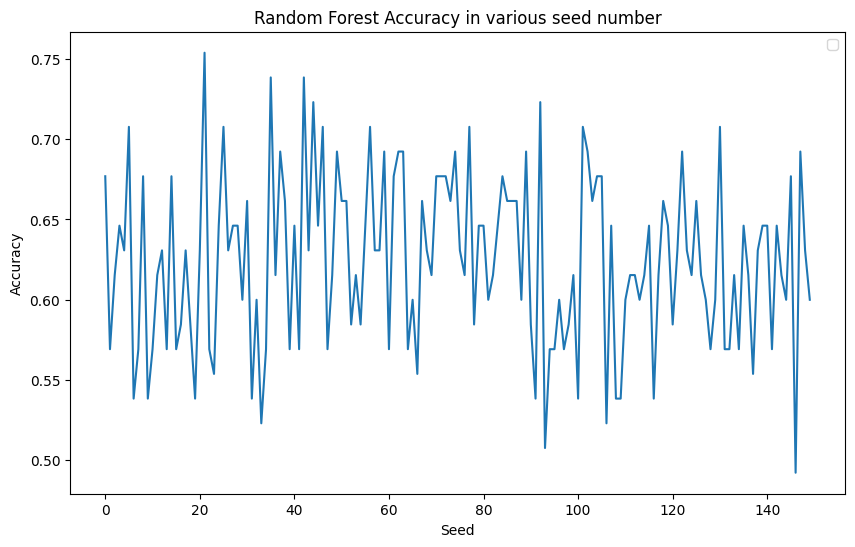

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(150), best_score_RF)
plt.legend()
plt.title('Random Forest Accuracy in various seed number')
plt.xlabel('Seed')
plt.ylabel('Accuracy')

2023-11-02 18:24:59.798043: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-02 18:24:59.798573: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


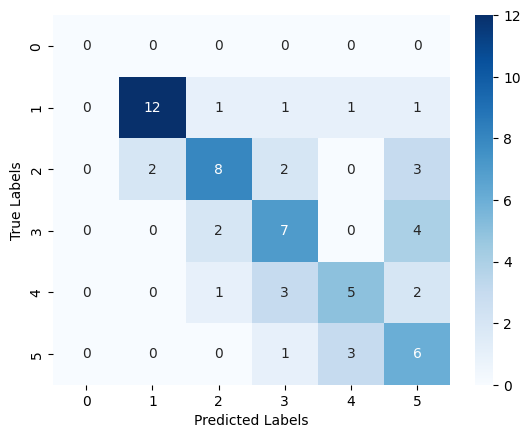

In [16]:
y_pred_rf = clf.predict(X_test)

# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using a heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [17]:
RandomForest_Confusion_matrix_table = PrettyTable(['metrices', 'values'])

# To insert rows:
RandomForest_Confusion_matrix_table.add_row(['Precision', sk.metrics.precision_score(y_test, y_pred_rf, average='weighted')])
RandomForest_Confusion_matrix_table.add_row(['Recall', sk.metrics.recall_score(y_test, y_pred_rf, average='weighted')])
RandomForest_Confusion_matrix_table.add_row(['f1_score', sk.metrics.f1_score(y_test, y_pred_rf, average='weighted')])

print(RandomForest_Confusion_matrix_table)

+-----------+--------------------+
|  metrices |       values       |
+-----------+--------------------+
| Precision | 0.6165445665445666 |
|   Recall  | 0.5846153846153846 |
|  f1_score | 0.5930002191540653 |
+-----------+--------------------+


# **Naive bayes**

In [18]:
from sklearn.naive_bayes import GaussianNB

# Build the Nave Bayes model
nb_classifier = GaussianNB()

# Train our model with the training data
nb_classifier.fit(X_train, y_train)

# Predict the labels with the test data
nb_y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f"Accuracy of Naive Bayes: {nb_accuracy}")

Accuracy of Naive Bayes: 0.47692307692307695


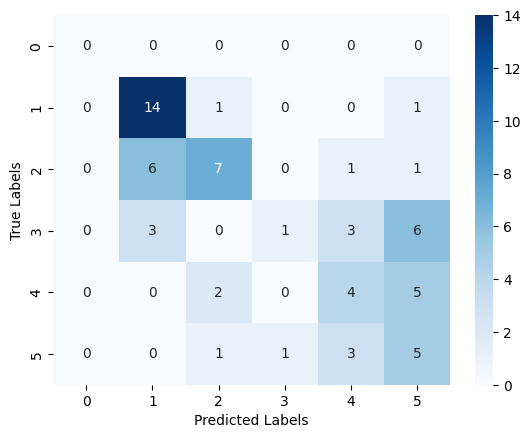

In [19]:
y_pred_nb = nb_classifier.predict(X_test)

# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_nb)

# Plot the confusion matrix using a heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [20]:
NaiveBaysian_Confusion_matrix_table = PrettyTable(['metrices', 'values'])

# To insert rows:
NaiveBaysian_Confusion_matrix_table.add_row(['Precision', sk.metrics.precision_score(y_test, y_pred_nb, average='weighted')])
NaiveBaysian_Confusion_matrix_table.add_row(['Recall', sk.metrics.recall_score(y_test, y_pred_nb, average='weighted')])
NaiveBaysian_Confusion_matrix_table.add_row(['f1_score', sk.metrics.f1_score(y_test, y_pred_nb, average='weighted')])

print(NaiveBaysian_Confusion_matrix_table)

+-----------+---------------------+
|  metrices |        values       |
+-----------+---------------------+
| Precision |  0.5009594270463836 |
|   Recall  | 0.47692307692307695 |
|  f1_score | 0.44413637644406884 |
+-----------+---------------------+


# **Decistion Tree**

In [21]:
from sklearn.tree import DecisionTreeClassifier

score = 0
score_list = []

# Find the best and optimal max_depth with high accuracy
for i in range(1,20):
    Class = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    Class.fit(X_train, y_train)
    score = Class.score(X_test, y_test)
    score_list.append(score)

print('max score=' , max(score_list),'max_depth= ',score_list.index(max(score_list)) + 1)

max score= 0.5538461538461539 max_depth=  17


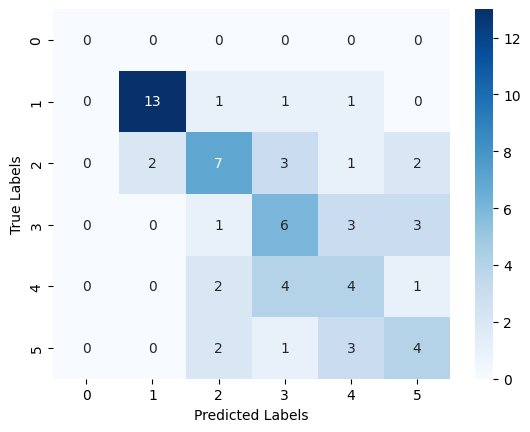

In [22]:
y_pred_dt = Class.predict(X_test)

# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix using a heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [23]:
DecisionTree_Confusion_Matrix_table = PrettyTable(['metrices', 'values'])

# To insert rows:
DecisionTree_Confusion_Matrix_table.add_row(['Precision', sk.metrics.precision_score(y_test, y_pred_dt, average='weighted')])
DecisionTree_Confusion_Matrix_table.add_row(['Recall', sk.metrics.recall_score(y_test, y_pred_dt, average='weighted')])
DecisionTree_Confusion_Matrix_table.add_row(['f1_score', sk.metrics.f1_score(y_test, y_pred_dt, average='weighted')])

print(DecisionTree_Confusion_Matrix_table)

+-----------+--------------------+
|  metrices |       values       |
+-----------+--------------------+
| Precision | 0.5355424063116372 |
|   Recall  | 0.5230769230769231 |
|  f1_score | 0.5279518517947691 |
+-----------+--------------------+


# **Neural Network**

In [24]:
# To train our dataset into the deep neural network model, at first we have to convert our dataset into categorical dataset
print("Before encoding our dataset labels")
print(y, '\n')

categorical_y = tf.keras.utils.to_categorical(y_resampled - 1)

print("After encoding our dataset labels")
print(categorical_y)

Before encoding our dataset labels
[2 4 1 1 3 1 3 1 1 5 3 3 3 3 3 5 3 1 3 3 3 3 3 3 1 1 3 1 4 2 4 2 3 2 1 3 3
 3 3 4 3 3 3 3 3 3 3 3 1 2 3 3 2 5 3 3 3 3 1 3 3 3 2 4 3 2 5 3 4 4 3 3 3 3
 3 2 3 3 3 3 3 1 4 5 3 3 2 3 3 3 2 3 3 3 3 5 1 3 3 3 3 2 3 3 5 4 4 4 3] 

After encoding our dataset labels
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [25]:
# Split our categorical dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, categorical_y, test_size=0.2, random_state=42)

In [26]:
# Build our deep neural network model
model = keras.Sequential([
    keras.layers.Dense(10, activation='leaky_relu', input_shape=(2,)),
    keras.layers.Dense(64, activation='leaky_relu'),
    keras.layers.Dense(128, activation='leaky_relu'),
    keras.layers.Dense(64, activation='leaky_relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Now it's time for compile our nn model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 64)                704       
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 5)                 325       
                                                                 
Total params: 17635 (68.89 KB)
Trainable params: 17635 (68.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Let's train our model with 100 epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, shuffle=True)

Epoch 1/100
6/6 [==============================] - 1s 44ms/step - loss: 1.5588 - accuracy: 0.2692 - val_loss: 1.5247 - val_accuracy: 0.3590
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 1.4481 - accuracy: 0.4505 - val_loss: 1.4781 - val_accuracy: 0.3333
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 1.3485 - accuracy: 0.4451 - val_loss: 1.4529 - val_accuracy: 0.3205
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 1.2589 - accuracy: 0.4560 - val_loss: 1.4592 - val_accuracy: 0.3205
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 1.2056 - accuracy: 0.4396 - val_loss: 1.4902 - val_accuracy: 0.3462
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 1.1769 - accuracy: 0.4560 - val_loss: 1.4874 - val_accuracy: 0.3590
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1461 - accuracy: 0.4670 - val_loss: 1.4793 - val_accuracy: 0.3590
Epoch 8/100
6/6 [=========

6/6 [==============================] - 0s 4ms/step - loss: 0.8893 - accuracy: 0.6209 - val_loss: 1.6143 - val_accuracy: 0.4359
Epoch 60/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8778 - accuracy: 0.6484 - val_loss: 1.6056 - val_accuracy: 0.4231
Epoch 61/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8927 - accuracy: 0.6264 - val_loss: 1.6053 - val_accuracy: 0.3974
Epoch 62/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8768 - accuracy: 0.6264 - val_loss: 1.5894 - val_accuracy: 0.4103
Epoch 63/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8740 - accuracy: 0.5934 - val_loss: 1.6092 - val_accuracy: 0.3718
Epoch 64/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8700 - accuracy: 0.6319 - val_loss: 1.6259 - val_accuracy: 0.4231
Epoch 65/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8741 - accuracy: 0.6319 - val_loss: 1.6203 - val_accuracy: 0.4103
Epoch 66/100
6/6 [===============

In [28]:
# Final evaluation of the model:
scores = model.evaluate(X_test, y_test - 1, verbose=1)
print(f'Test accuracy: {scores[1]}')

3/3 [==============================] - 0s 2ms/step - loss: -20.8721 - accuracy: 0.5692
Test accuracy: 0.5692307949066162


In [29]:
def plot_loss(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's training loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def plot_accuracy(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model's training accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

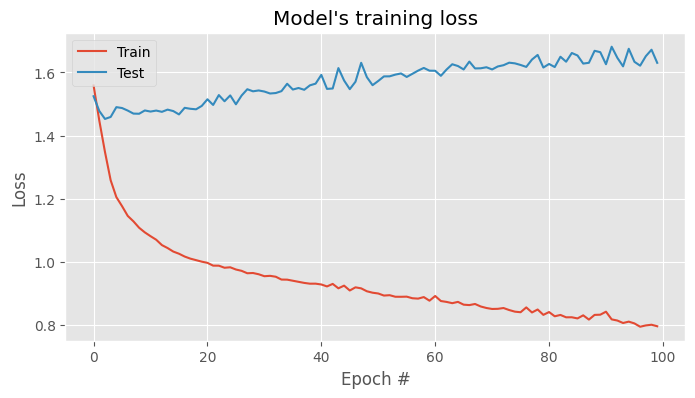

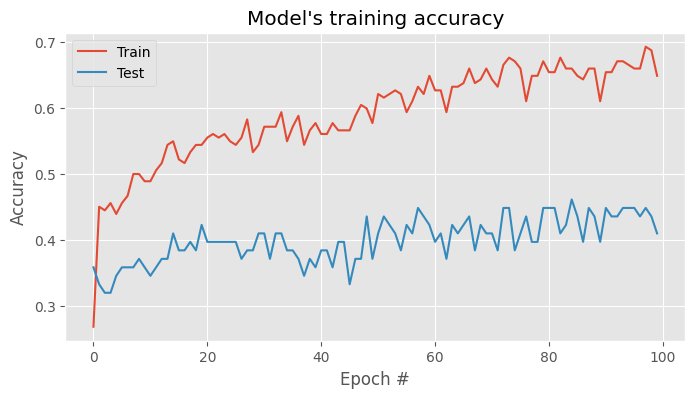

In [30]:
# Let's take a look at our model perfomance
plot_loss(history)
plot_accuracy(history)

3/3 [==============================] - 0s 2ms/step


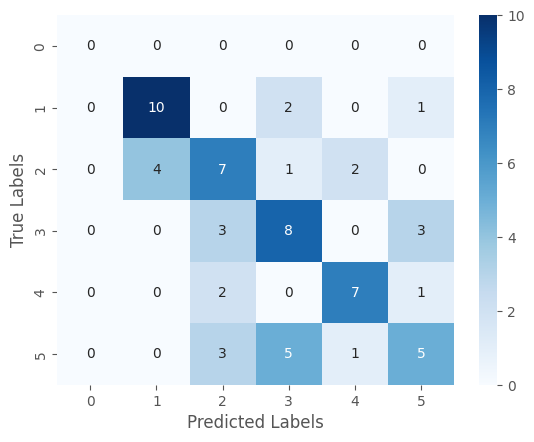

In [31]:
y_pred = model.predict(X_test)

y_test_real = []
y_pred_real = []

for i in range(len(y_test)):
  y_test_real.append(np.argmax(y_test[i]) + 1)
  y_pred_real.append(np.argmax(y_pred[i]) + 1)
    
# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test_real, y_pred_real)

# Plot the confusion matrix using a heatmap
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [32]:
NN_Confusion_Matrix_table = PrettyTable(['metrices', 'values'])

# To insert rows:
NN_Confusion_Matrix_table.add_row(['Precision', sk.metrics.precision_score(y_test_real, y_pred_real, average='weighted')])
NN_Confusion_Matrix_table.add_row(['Recall', sk.metrics.recall_score(y_test_real, y_pred_real, average='weighted')])
NN_Confusion_Matrix_table.add_row(['f1_score', sk.metrics.f1_score(y_test_real, y_pred_real, average='weighted')])

print(NN_Confusion_Matrix_table)

+-----------+--------------------+
|  metrices |       values       |
+-----------+--------------------+
| Precision | 0.5664468864468866 |
|   Recall  | 0.5692307692307692 |
|  f1_score | 0.5644346202966893 |
+-----------+--------------------+
